                            Project Milestone 3 

Model Building & Evaluation steps:

1. The objective of the project is whether a loan provided will likely be charged off or not. This is a classification problem and hence a classification model is used.

2. The most impactful features determined in project milestone 2 are populated as X- the predictor variables and loan_status_charged off is assigned as target variable.

3. Using sklearn's traintestsplit, the dataset is split into Xtrain, Xtest, ytrain and ytest. 

4. GridSearchCv is used to determine the model that will provide more accurate results among - Logistic Regression and Random Forest.

5. Model accuracy score and confusion matrix metrics are determined on x_test, y_test dataset.

In [2]:
# Load required libraries

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load the data into dataframe and review the data

loanapp_df = pd.read_csv("/Users/manikantanvenkataraman/Downloads/archive (1)/loan/loan.csv")
loanapp_df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Split the dataframe into multiple dataframe based on loan status
status=['Charged Off', 'Fully Paid']
inactive_loans = loanapp_df[loanapp_df.loan_status.isin(status)]
current_loans = loanapp_df[loanapp_df.loan_status=='Current']

In [5]:
# Drop the fields with null values for more than 97%

inactive_loans.drop(['next_pymnt_d', 'annual_inc_joint', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis = 1, inplace=True)
current_loans.drop(['next_pymnt_d', 'annual_inc_joint', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis = 1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
# Transform the field - verification_status

inactive_loans['verification_status'] = inactive_loans['verification_status'].replace(['Source Verified'],'Verified')
current_loans['verification_status'] = current_loans['verification_status'].replace(['Source Verified'],'Verified')
inactive_loans.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [7]:
# Convert the categorical values into dummies in inactive loan dataframe


dummies1 = pd.get_dummies(inactive_loans[['term', 'grade', 'sub_grade', 'verification_status','purpose', 'emp_length','home_ownership']], drop_first=True)
inactive_loans.loan_status.unique()
inactive_loans = pd.concat([inactive_loans.drop(['term', 'grade', 'sub_grade', 'verification_status','purpose', 'emp_length','home_ownership'],axis=1), dummies1],axis=1)
inactive_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_title,annual_inc,issue_d,...,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,NaN,24000.0,Dec-2011,...,0,0,0,0,0,0,0,0,0,1
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,Ryder,30000.0,Dec-2011,...,0,0,0,0,1,0,0,0,0,1
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,NaN,12252.0,Dec-2011,...,0,0,0,0,0,0,0,0,0,1
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,AIR RESOURCES BOARD,49200.0,Dec-2011,...,0,0,0,0,0,0,0,0,0,1
5,1075269,1311441,5000.0,5000.0,5000.0,7.90,156.46,Veolia Transportaton,36000.0,Dec-2011,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Target variable 

status_dummy = pd.get_dummies(inactive_loans, columns=['loan_status'])
inactive_loans=status_dummy
inactive_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_title,annual_inc,issue_d,...,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_status_Charged Off,loan_status_Fully Paid
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,NaN,24000.0,Dec-2011,...,0,0,0,0,0,0,0,1,0,1
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,Ryder,30000.0,Dec-2011,...,0,0,1,0,0,0,0,1,1,0
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,NaN,12252.0,Dec-2011,...,0,0,0,0,0,0,0,1,0,1
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,AIR RESOURCES BOARD,49200.0,Dec-2011,...,0,0,0,0,0,0,0,1,0,1
5,1075269,1311441,5000.0,5000.0,5000.0,7.90,156.46,Veolia Transportaton,36000.0,Dec-2011,...,0,0,0,0,0,0,0,1,0,1


In [9]:
# Scale the numeric features
from sklearn.preprocessing import StandardScaler
x=inactive_loans[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med','mths_since_last_major_derog','mths_since_last_major_derog','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']]
x=x.fillna(0)
scaler=StandardScaler().fit(x)
x_scaled= scaler.transform(x)
x_scaled_df=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-1.053009,-1.050930,-1.040172,-0.707561,-1.042092,-0.825316,1.425902,-0.337449,0.138268,-0.686445,...,-0.131759,-0.212988,-0.146876,-0.075556,-0.421016,-0.421016,-0.051443,-0.008355,-0.714341,-0.777085
1,-1.360447,-1.359222,-1.344688,0.341982,-1.462779,-0.723296,-1.995730,-0.337449,3.887543,-0.686445,...,-0.131759,-0.056484,-0.137145,-0.075556,-0.421016,-0.421016,-0.051443,-0.008355,-0.714341,-0.777085
2,-1.372745,-1.371553,-1.356991,0.498732,-1.362751,-1.025073,-1.004548,-0.337449,1.075587,-0.686445,...,-0.131759,-0.212988,-0.146876,-0.075556,-0.421016,-0.421016,-0.051443,-0.008355,-0.714341,-0.777085
3,-0.438133,-0.434346,-0.421914,-0.062388,-0.321730,-0.396830,0.443708,-0.337449,0.138268,0.854194,...,2.992773,-0.212988,-0.146876,-0.075556,-0.421016,-0.421016,-0.051443,-0.008355,-0.714341,-0.777085
4,-1.053009,-1.050930,-1.037096,-1.332289,-1.068262,-0.621275,-0.686137,-0.337449,2.012906,-0.686445,...,-0.131759,-0.212988,-0.146876,-0.075556,-0.421016,-0.421016,-0.051443,-0.008355,-0.714341,-0.777085


In [11]:
# Top 7 numeric features that determine charge off using Forward Feature Selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

y=inactive_loans['loan_status_Charged Off']
X= x_scaled_df
lreg = LogisticRegression()
sfs1 = sfs(lreg, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.7s finished

[2022-06-04 11:31:18] Features: 1/7 -- score: -0.09017244179565773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   35.8s finished

[2022-06-04 11:31:54] Features: 2/7 -- score: -0.07225331446641589[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   42.0s finished

[2022-06-04 11:32:36] Features: 3/7 -- score: -0.01001299259920126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

['funded_amnt', 'delinq_2yrs', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'mths_since_last_major_derog']


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   53.9s finished

[2022-06-04 11:36:01] Features: 7/7 -- score: -0.009186814239091788

In [12]:

# Select the top 10 features using chi2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

x= inactive_loans[['term_ 60 months','grade_B','grade_C','grade_D','grade_E', 'grade_F', 'grade_G', 'verification_status_Verified','emp_length_10+ years','emp_length_3 years', 'emp_length_4 years', 'emp_length_2 years','emp_length_5 years', 'emp_length_6 years','emp_length_7 years', 'emp_length_8 years','emp_length_9 years','emp_length_< 1 year','home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']]
chi2_selector= SelectKBest(chi2, k=10)
features_kbest=chi2_selector.fit_transform(x,y)

print("Original number of features:", x.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

# Obtain the feature names of the top 5 influencing features
cols = chi2_selector.get_support(indices=True)
features_df_new = x.iloc[:,cols]
features_df_new.head()

Original number of features: 23
Reduced number of features: 10


,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_RENT
0,0,1,0,0,0,0,0,1,0,1
1,1,0,1,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1
5,0,0,0,0,0,0,0,1,0,1


In [20]:
# Selected features
# Train - Test split

from sklearn.model_selection import train_test_split

X=inactive_loans[['term_ 60 months','grade_B', 'grade_C', 'grade_D','grade_E', 'grade_F', 'grade_G', 'verification_status_Verified', 'home_ownership_MORTGAGE','home_ownership_RENT','funded_amnt', 'delinq_2yrs', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries']]
y=inactive_loans[['loan_status_Charged Off']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
X.dropna()
y.dropna()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(169490, 23) (83481, 23) (169490, 1) (83481, 1)


In [16]:
# model selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pipe=Pipeline([("classifier", RandomForestClassifier())])

search_space=[{"classifier": [LogisticRegression()], "classifier__penalty":['l2'], "classifier__C": np.logspace(0,4,10)}, {"classifier": [RandomForestClassifier()], "classifier__n_estimators":[10,100,1000], "classifier__max_features":[1,2,3]}]

In [22]:
# Grid search to obtain the best model

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs = -1)
best_model = clf.fit(x_train, y_train)
print(best_model.best_estimator_.get_params()["classifier"])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [23]:
# Best Model Score

clf.score(x_test, y_test)

0.8189049005162852

In [24]:
# Logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# Confusion Matrix - Logistic Regression
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[68312,   144],
       [  120, 68522]])

Text(0.5, 257.44, 'Predicted label')

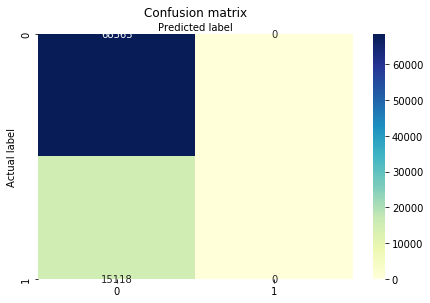

In [26]:
# Heat map for the confusion matrix - Logistic Regression

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
#Confusion Matrix Evaluation Metrics - Logistic Regression

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8189049005162852
Precision: 0.0
Recall: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


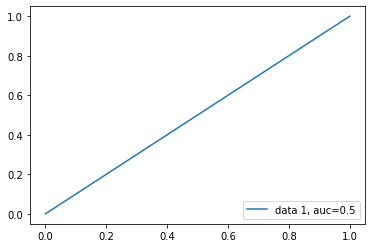

In [28]:
# ROC Curve - Logistic Regression

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
# Define the Random Forest Model
model = RandomForestClassifier()

# Fit the model 
model.fit(x_train, y_train.values.ravel())
y_pred=model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[68150,   213],
       [14959,   159]])

In [30]:
#Confusion Matrix Evaluation Metrics - Random Forest

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8182580467411746
Precision: 0.4274193548387097
Recall: 0.010517264188384707


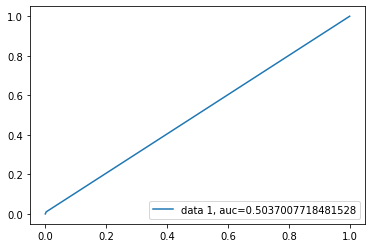

In [31]:
# ROC Curve - Random Forest

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

                                
                                
 GridSearchCV passed the training dataset through both logistic regression and random forest models and determined that logistc regression is the best model for determining if a loan will likely be charged off. The logistic regression model also has the best model score of 82.22%
 
 However, while evaluating confusion matrix metrics, it is observed that the precision for logistic regression is just 1, while the same for Random forest is 40. The accuracy of Random forest is 81.88%, not much lesser than Logistic Regression. Hence, Random forest seems to be a better model for the objective with the chosen dataset.

In [1]:
# check version number
import sklearn
print(sklearn.__version__)

0.21.0


In [1]:
conda list    

# packages in environment at /opt/anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2019.10                  py37_0  
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
absl-py                   1.0.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda                  custom                   py37_1  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.3                      py_0  
appnope                   0.1.0                    py37_0  
appscript                 1.1.0            py37h1de35cc_0  
asn1crypto                1.0.1                    py37_0  
astor                     0.8.1                    pypi_0    pypi
astroid                   2.3.1                    py37_0  
astropy                   3.2.2            py37h1de35cc_0  
astunparse                1.6.3   

In [5]:
conda install scikit-learn

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::pytest-astropy==0.5.0=py37_0
  - defaults/osx-64::imageio==2.6.0=py37_0
  - defaults/noarch::flask==1.1.1=py_0
  - defaults/osx-64::pytables==3.5.2=py37h5bccee9_1
  - defaults/osx-64::scikit-image==0.15.0=py37h0a44026_0
  - defaults/osx-64::conda==4.7.12=py37_0
  - defaults/noarch::numpydoc==0.9.1=py_0
  - defaults/osx-64::pytest==5.2.1=py37_0
  - defaults/noarch::anaconda-project==0.8.3=py_0
  - defaults/osx-64::bottleneck==1.2.1=py37h1d22016_1
  - defaults/osx-64::pytest-arraydiff==0.3=py37h39e3cac_0
  - defaults/osx-64::pywavelets==1.0.3=py37h1d22016_1
  - defaults/osx-64::matplotlib==3.1.1=py37h54f8f79_0
  - defaults/osx-64::numexpr==2.7.0=py37h7413580_0
  - defaults/noarch::sphinx==2.2.0=py_0
  - defaults/osx-64::bkcharts==0.2=py37_0
  - defaults/osx-64::h5py==2.9.0=py37h3134771_0
  - defaults/osx-64::anaconda=

In [11]:
!pip uninstall scikit-learn --yes

Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [12]:

!pip install 'scikit-learn==0.21'

     |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01


In [46]:
conda uninstall -c glemaitre imbalanced-learn

Solving environment: / ^C
| 
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Resampling the data using SMOTE

from sklearn.model_selection import train_test_split

X=inactive_loans[['term_ 60 months','grade_B', 'grade_C', 'grade_D','grade_E', 'grade_F', 'grade_G', 'verification_status_Verified', 'home_ownership_MORTGAGE','home_ownership_RENT','funded_amnt', 'delinq_2yrs', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries']]
y=inactive_loans[['loan_status_Charged Off']]

X.dropna()
y.dropna()


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [19]:
# Rerun the model after resampling
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Define the Random Forest Model
model = RandomForestClassifier()

# Fit the model 
model.fit(x_train, y_train.values.ravel())
y_pred=model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[68299,   162],
       [  103, 68534]])

In [20]:
#Confusion Matrix Evaluation Metrics - Random Forest - after resampling

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9980670761061431
Precision: 0.9976417840922325
Recall: 0.9984993516616403


                               CONCLUSION
           
           After balancing the dataset, it is observed that the accuracy, precision and recall has improved significantly for the model.